### $\color{orange}{\text{Import Libraries}}$

In [1]:
# pandas is a software libraary for data manipuation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Seaborn is a Python data visuaization library based on matplotlib.
import seaborn as sns
# preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K NearestNeighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


## $\color{purple}{\textbf{Data pre-processing}}$

In [2]:
df = pd.read_csv('dataset_falcon9.csv')
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

### $\color{orange}{\text{Drop Columns}}$ 

In [4]:
df = df.drop(['FlightNumber','Date','BoosterVersion','Longitude','Latitude'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 7.4+ KB


### $\color{orange}{\text{Dummy Variable}}$ 

In [6]:
#example1
df['LaunchSite']

0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4     CCAFS SLC 40
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

In [7]:
set(df['LaunchSite'])

{'CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'}

In [8]:
dummy_1 = pd.get_dummies(df['LaunchSite'])
dummy_1

,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
85,0,1,0
86,0,1,0
87,0,1,0
88,1,0,0


In [9]:
#example2
df['LandingPad']

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                ...           
85    5e9e3032383ecb6bb234e7ca
86    5e9e3032383ecb6bb234e7ca
87    5e9e3032383ecb6bb234e7ca
88    5e9e3033383ecbb9e534e7cc
89    5e9e3032383ecb6bb234e7ca
Name: LandingPad, Length: 90, dtype: object

In [10]:
set(df['LandingPad'])

{'5e9e3032383ecb267a34e7c7',
 '5e9e3032383ecb554034e7c9',
 '5e9e3032383ecb6bb234e7ca',
 '5e9e3032383ecb761634e7cb',
 '5e9e3033383ecbb9e534e7cc',
 nan}

In [11]:
dummy_2 = pd.get_dummies(df['LandingPad'])
dummy_2[10:20]

,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
10,0,0,0,0,0
11,0,0,0,1,0
12,0,0,0,0,0
13,0,0,0,1,0
14,0,0,0,0,0
15,0,0,1,0,0
16,1,0,0,0,0
17,0,0,0,0,1
18,0,0,1,0,0
19,0,0,1,0,0


In [12]:
#main
df_dummy = pd.get_dummies(df[['Orbit','LaunchSite','Outcome','LandingPad','Serial']])
df_dummy


,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### $\color{orange}{\text{Boolean Variable}}$ 

In [13]:
#example
df['GridFins']

0     False
1     False
2     False
3     False
4     False
      ...  
85     True
86     True
87     True
88     True
89     True
Name: GridFins, Length: 90, dtype: bool

In [14]:
df['GridFins'] = df['GridFins'].astype(int)
df['Reused'] = df['Reused'].astype(int)
df['Legs'] = df['Legs'].astype(int)

In [15]:
df['GridFins']

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: GridFins, Length: 90, dtype: int64

### $\color{orange}{\text{Concatenate }}$

In [16]:
df = df.drop(['Orbit','LaunchSite','Outcome','LandingPad','Serial'], axis=1)

In [17]:
df=pd.concat([df,df_dummy],axis=1)

In [18]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5.0,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### $\color{orange}{\text{Save Pre-processed Data in csv-file }}$

In [19]:
df.to_csv('/Users/tara/Desktop/SelfLearning/preprocessed_dataset.csv')

# $\color{Purple}{\textbf{Space X Project}}$

### $\color{orange}{\text{Function for Plot}}$

In [20]:
def plot_confution_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)   #annot=True to annonate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [21]:
preprocessed = pd.read_csv('preprocessed_dataset.csv')
preprocessed.head(100)

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,0,0,1,0
86,86,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,1,0,0,0
87,87,15400.000000,6,1,1,1,5.0,5,1,0,...,0,0,0,1,0,0,0,0,0,0
88,88,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,0,0,1,0


### $\color{orange}{\text{Define X , y }}$ 

In [22]:
X = preprocessed.drop('Class',axis=1)
y = preprocessed['Class']

### $\color{orange}{\text{Preprocessing- Standardize}}$

In [23]:
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
X_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

### $\color{orange}{\text{Array to Dataframe}}$ 

In [24]:
col = X.columns
# print(col)
X = pd.DataFrame(X_scaled, columns=col)
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


### $\color{orange}{\text{Train set- Test set in sklearn library}}$

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### $\color{orange}{\text{Logistic Regression}}$

In [26]:
lr= LogisticRegression()
parameters = {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters, cv=4)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [27]:
print("tuned Hpyerparameters:(best parameters)", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned Hpyerparameters:(best parameters) {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.875


In [28]:
accu = []
methods = []


methods.append('Logistic Regression')
accu.append(logreg_cv.score(x_test, y_test))
logreg_cv.score(x_test, y_test)

#OR (Tara)
# predictions = logreg_cv.predict(x_test)
# accuracy_score(y_test, predictions, normalize=True)

0.8888888888888888

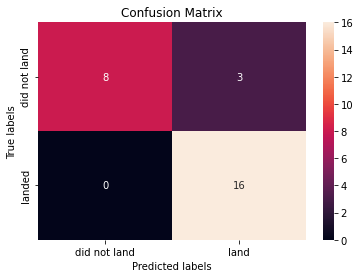

In [29]:
#Confusion Matrix

predictions = logreg_cv.predict(x_test)
plot_confution_matrix(y_test, predictions)

### $\color{orange}{\text{Support Vector Machine (SVM)}}$

In [30]:
parameters = {'C':[0.5,1,1.5],'kernel':['linear', 'poly', 'rbf','sigmoid']}

svm = SVC()

In [31]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [32]:
print("tuned Hpyerparameters:(best parameters)", svm_cv.best_params_)
print("accuracy: ", svm_cv.best_score_)

tuned Hpyerparameters:(best parameters) {'C': 1, 'kernel': 'sigmoid'}
accuracy:  0.9380952380952381


In [33]:
methods.append('Support Vector Machine (SVM)')
accu.append(svm_cv.score(x_test, y_test))
svm_cv.score(x_test, y_test)

0.8888888888888888

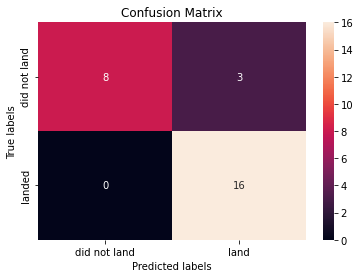

In [34]:
predictions = svm_cv.predict(x_test)
plot_confution_matrix(y_test, predictions)

### $\color{orange}{\text{Decission Trees}}$

In [35]:
parameters = {'criterion':['gini','entropy'], 
              'splitter':['best','random'],
              'max_depth':[2*n for n in range(1,10)],
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[1,2,4],
              'min_samples_split':[2,5,10]}

tree = DecisionTreeClassifier()

In [36]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/an

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [37]:
print("tuned Hpyerparameters:(best parameters)", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned Hpyerparameters:(best parameters) {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy:  0.9690476190476189


In [38]:
methods.append('Decission Tree Classifier')
accu.append(tree_cv.score(x_test, y_test))
tree_cv.score(x_test, y_test)

0.8148148148148148

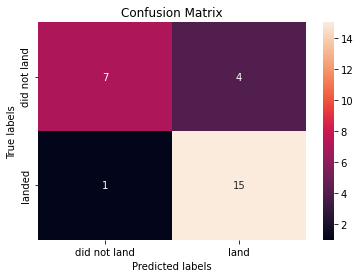

In [39]:
predictions = tree_cv.predict(x_test)
plot_confution_matrix(y_test, predictions)

### $\color{orange}{\text{K Nearest Neighbor}}$

In [40]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'p':[1,2]}

KNN = KNeighborsClassifier()

In [41]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [42]:
print("tuned Hpyerparameters:(best parameters)", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned Hpyerparameters:(best parameters) {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy:  0.8928571428571429


In [43]:
methods.append('K Nearest Neighbor')
accu.append(knn_cv.score(x_test, y_test))
knn_cv.score(x_test, y_test)

0.8518518518518519

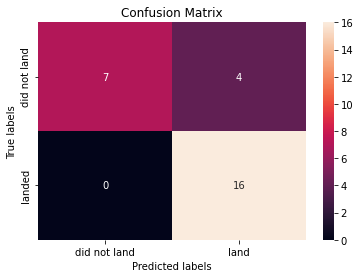

In [44]:
predictions = knn_cv.predict(x_test)
plot_confution_matrix(y_test, predictions)

### $\color{orange}{\text{The Best Performed Model}}$

In [45]:
print(methods)
print(accu)

['Logistic Regression', 'Support Vector Machine (SVM)', 'Decission Tree Classifier', 'K Nearest Neighbor']
[0.8888888888888888, 0.8888888888888888, 0.8148148148148148, 0.8518518518518519]


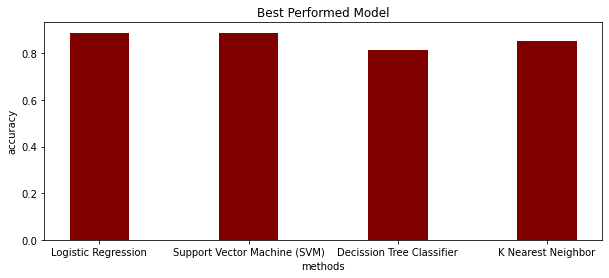

In [46]:
fig = plt.figure(figsize=(10,4))
plt.bar(methods, accu, color='maroon', width=0.4)
plt.xlabel('methods')
plt.ylabel('accuracy')
plt.title('Best Performed Model')
plt.show()

### $\color{orange}{\text{Receiver Operating Characteristic Curve (ROC Curve)}}$


In [47]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'Area under ROC')

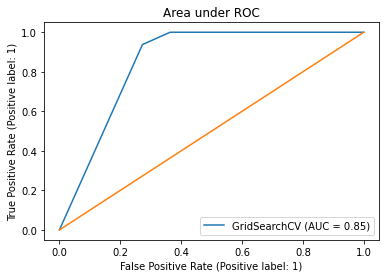

In [48]:
RocCurveDisplay.from_estimator(knn_cv,x_test,y_test)
plt.plot([0,1],[0,1])
plt.title('Area under ROC')